# Space Mission Analysis 1957 - 2023

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) using BeautifulSoup

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Dataset

In [4]:
df_data = pd.read_csv('mission_launches_updated.csv')

# Data Exploration



In [23]:
df_data.shape

(6510, 8)

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6510 non-null   int64  
 1   Organisation    6510 non-null   object 
 2   Location        6510 non-null   object 
 3   Datetime        6510 non-null   object 
 4   Details         6510 non-null   object 
 5   Status          6510 non-null   object 
 6   Price           2475 non-null   float64
 7   Mission_status  6510 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 407.0+ KB


In [30]:
df_data.duplicated().values.any()

False

In [31]:
display(df_data.head())
display(df_data.tail())

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sun Apr 16, 2023 01:36 UTC",Long March 4B | Fengyun-3G,Active,64.68,Success
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 15, 2023 06:48 UTC",Falcon 9 Block 5 | Transporter 7,Active,67.00,Success
2,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Apr 14, 2023 12:14 UTC",Ariane 5 ECA | JUICE (Jupiter Icy Moons Explorer),Active,200.00,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Apr 07, 2023 04:30 UTC",Falcon 9 Block 5 | Intelsat 40e/TEMPO,Active,67.00,Success
4,i-Space,"Site 95, Jiuquan Satellite Launch Center, China","Fri Apr 07, 2023 04:00 UTC",Hyperbola-1 | Dummy Payload,Active,NaN,Success


,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6505,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6506,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,NaN,Success
6507,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,NaN,Failure
6508,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success
6509,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik 1,Retired,NaN,Success


In [5]:
df_data.drop('Unnamed: 0', axis=1, inplace=True)

In [32]:
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sun Apr 16, 2023 01:36 UTC",Long March 4B | Fengyun-3G,Active,64.68,Success
1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 15, 2023 06:48 UTC",Falcon 9 Block 5 | Transporter 7,Active,67.00,Success
2,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Apr 14, 2023 12:14 UTC",Ariane 5 ECA | JUICE (Jupiter Icy Moons Explorer),Active,200.00,Success
3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Apr 07, 2023 04:30 UTC",Falcon 9 Block 5 | Intelsat 40e/TEMPO,Active,67.00,Success
4,i-Space,"Site 95, Jiuquan Satellite Launch Center, China","Fri Apr 07, 2023 04:00 UTC",Hyperbola-1 | Dummy Payload,Active,NaN,Success


## Descriptive Statistics

In [29]:
df_data.describe()

,Price
count,"2,475.00"
mean,70.31
std,104.15
min,2.50
25%,20.00
50%,29.75
75%,65.00
max,876.00


# Number of Launches per Organisation



In [39]:
orgs = df_data['Organisation'].value_counts()
orgs.index

Index(['RVSN USSR', 'US Air Force', 'CASC', 'Roscosmos', 'VKS RF',
       'Arianespace', 'General Dynamics', 'SpaceX', 'NASA', 'ULA', 'Boeing',
       'ILS', 'Martin Marietta', 'Northrop', 'ISRO', 'MHI', 'Lockheed',
       'Starsem', 'Sea Launch', 'Rocket Lab', 'ISAS', 'Blue Origin',
       'Kosmotras', 'ABMA', 'US Navy', 'ExPace', 'ISA', 'ESA', 'IAI',
       'Eurockot', 'Virgin Galactic', 'CASIC', 'JAXA', 'ASI', 'CNES', 'Astra',
       'MITT', 'Land Launch', 'Virgin Orbit', 'i-Space', 'KARI',
       'Galactic Energy', 'KCST', 'UT', 'Armée de l'Air', 'CECLES', 'Scaled',
       'SRC', 'AEB', 'Firefly', 'OKB-586', 'IRGC', 'Landspace', 'RAE',
       'Sandia', 'OneSpace', 'Douglas', 'Space Pioneer', 'CAS Space', 'EER',
       'GK LS', 'ABL SS', 'Relativity Space'],
      dtype='object')

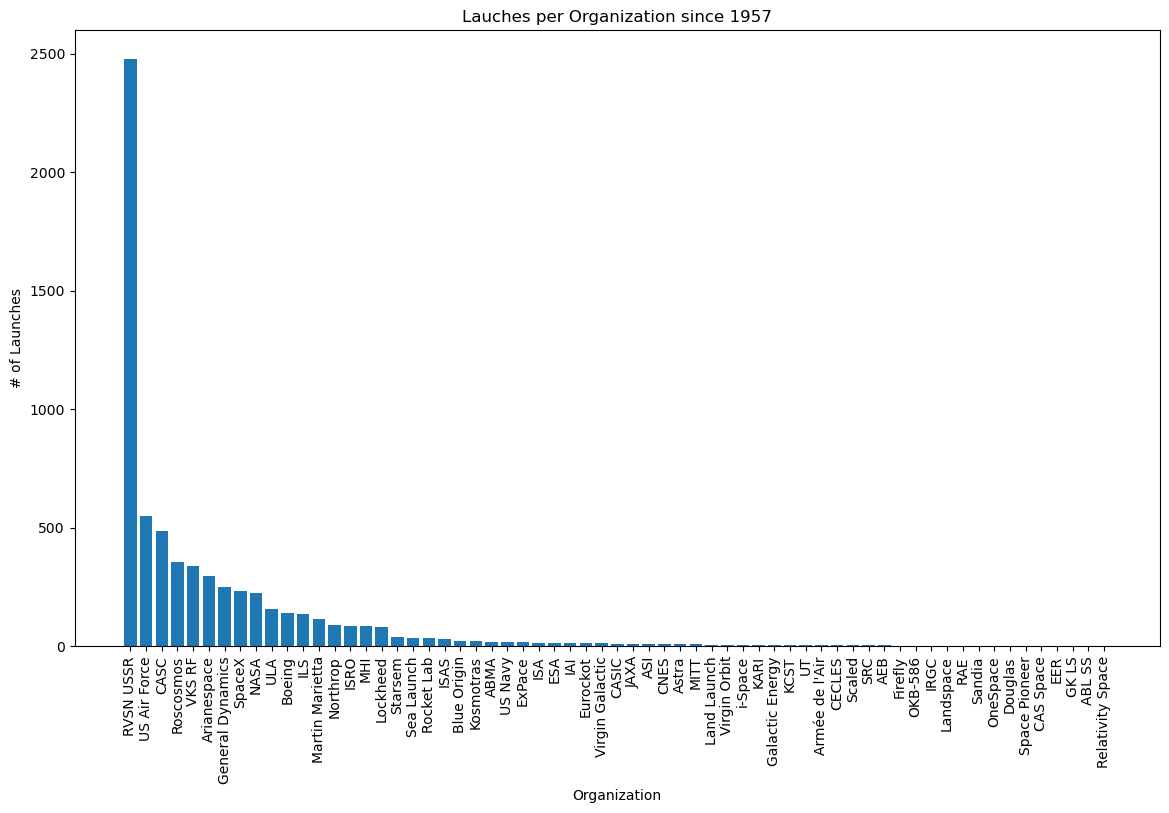

In [45]:
plt.figure(figsize=(14,8))
plt.bar(orgs.index, orgs.values)
plt.xticks(rotation=90)
plt.xlabel('Organization')
plt.ylabel('# of Launches')
plt.title('Lauches per Organization since 1957', fontsize=14)
plt.show()

# Number of Active vs Retired Rockets



In [46]:
df_data['Status'].value_counts()

Retired    5140
Active     1370
Name: Status, dtype: int64

# Distribution of Mission Status



In [47]:
df_data['Mission_status'].value_counts()

Success              5942
Failure               448
Partial Failure       112
Prelaunch Failure       8
Name: Mission_status, dtype: int64

# Price of Launches 



Text(0.5, 1.0, 'Prices of Launches Distibution')

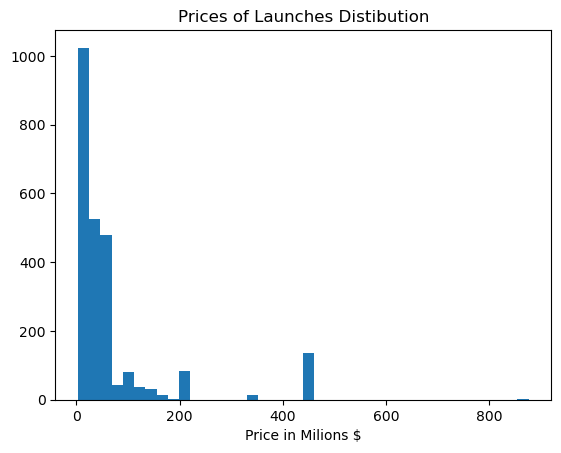

In [7]:
plt.hist(x=df_data['Price'], bins=40)
plt.xlabel('Price in Milions $')
plt.title('Prices of Launches Distibution')

#  Number of Launches by Country



In [8]:
df_data.head()

,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sun Apr 16, 2023 01:36 UTC",Long March 4B | Fengyun-3G,Active,64.68,Success
1,1,SpaceX,"SLC-4E, Vandenberg SFB, California, USA","Sat Apr 15, 2023 06:48 UTC",Falcon 9 Block 5 | Transporter 7,Active,67.00,Success
2,2,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Apr 14, 2023 12:14 UTC",Ariane 5 ECA | JUICE (Jupiter Icy Moons Explorer),Active,200.00,Success
3,3,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Fri Apr 07, 2023 04:30 UTC",Falcon 9 Block 5 | Intelsat 40e/TEMPO,Active,67.00,Success
4,4,i-Space,"Site 95, Jiuquan Satellite Launch Center, China","Fri Apr 07, 2023 04:00 UTC",Hyperbola-1 | Dummy Payload,Active,NaN,Success


In [9]:
country = df_data['Location'].str.split(',').apply(lambda c: c[-1])
df_data['Country'] = country

In [10]:
by_country = df_data['Country'].value_counts()
country_df = pd.DataFrame({'country': by_country.index, 'count':by_country.values})
country_df

,country,count
0,USA,1951
1,Russia,1804
2,Kazakhstan,1548
3,China,520
4,France,322
5,Japan,130
6,India,86
7,Pacific Ocean,36
8,New Zealand,33
9,Iran,17


In [12]:
fig = px.choropleth(country_df, locations="country",
                    locationmode='country names',
                    color="count", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter,
                   title='Number of Launches per Country since 1957',
                   width=800)
fig.update_layout(title_x=0.5)
fig.show()
fig.write_html("launch_per_country.html")

# Number of Failures by Country


In [123]:
failures_df = df_data[df_data['Mission_status'] == 'Failure'].groupby('Country').agg({'Mission_status': pd.Series.count})
failures_df.reset_index(inplace=True)
failures_df

,Country,Mission_status
0,Australia,4
1,Barents Sea,1
2,Brazil,2
3,China,26
4,France,15
5,India,10
6,Iran,8
7,Israel,4
8,Japan,13
9,Kazakhstan,113


In [125]:
fig = px.choropleth(failures_df, locations="Country",
                    locationmode='country names',
                    color="Mission_status", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Sunburst Chart of the countries, organisations, and mission status. 

In [130]:
burst = px.sunburst(df_data, path=['Country','Organisation', 'Mission_status'])
burst.show()
burst.write_html("suburst.html")

# Money Spent by Organisation on Space Missions

In [13]:
price_df = df_data[['Organisation','Price']].dropna()
p_df = price_df.groupby('Organisation').sum().sort_values('Price', ascending=False)

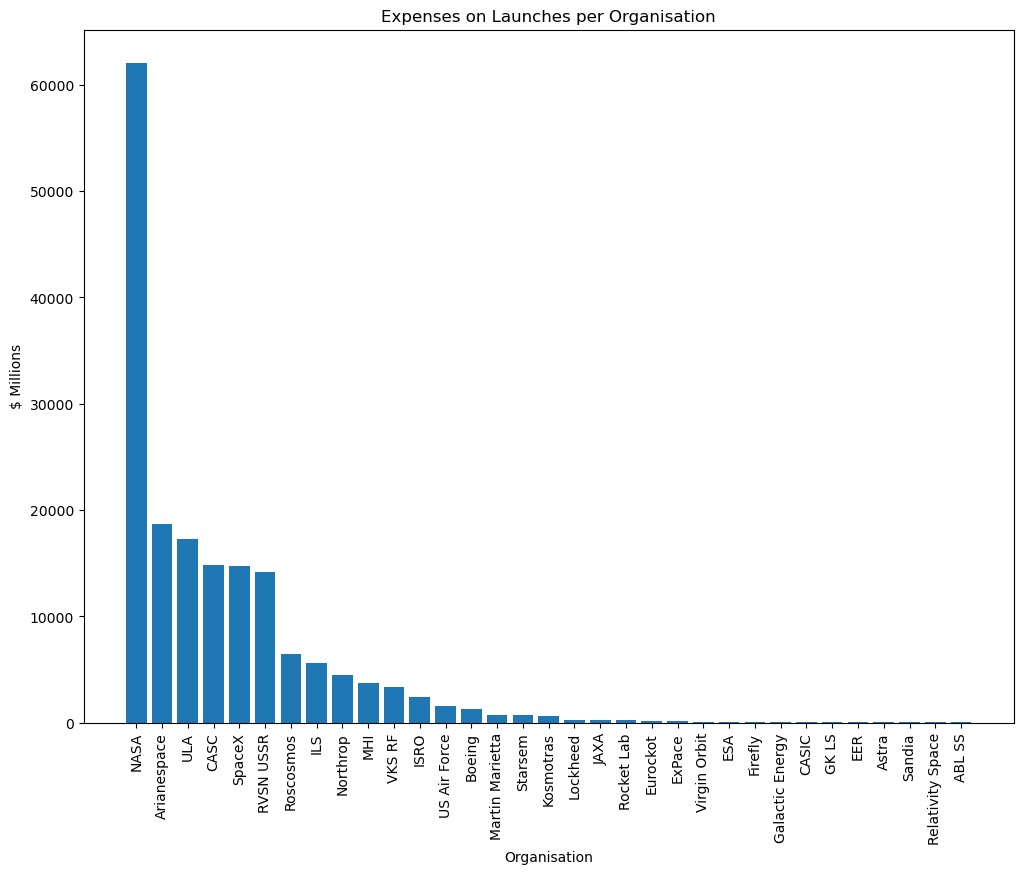

In [15]:
plt.figure(figsize=(12,9))
plt.bar(p_df.index, p_df['Price'])

plt.xlabel('Organisation')
plt.ylabel('$ Millions')
plt.xticks(rotation=90)
plt.title('Expenses on Launches per Organisation')

plt.show()

# Average Expenses by Organisation per Launch

In [199]:
org_per_launch = df_data[['Organisation','Price']]

# mean = org_per_launch.groupby('Organisation')['Price'].mean()

org_per_launch['Price'] = org_per_launch.groupby('Organisation').transform(lambda x: x.fillna(x.mean()))

org_per_launch.isna().values.sum() #was 4k to 400
org_per_launch.dropna(inplace=True)
org_per_launch


C:\Users\kaczo\AppData\Local\Temp\ipykernel_20812\1528561184.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kaczo\AppData\Local\Temp\ipykernel_20812\1528561184.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,CASC,64.68
1,SpaceX,67.00
2,Arianespace,200.00
3,SpaceX,67.00
5,SpaceX,67.00
...,...,...
6493,US Air Force,59.65
6499,RVSN USSR,21.61
6501,RVSN USSR,21.61
6508,RVSN USSR,21.61


In [200]:
org_per_launch=org_per_launch.groupby('Organisation').agg({'Price':pd.Series.mean})
org_per_launch

,Price
Organisation,
ABL SS,12.00
Arianespace,141.54
Astra,2.50
Boeing,177.29
CASC,39.96
CASIC,5.80
EER,20.00
ESA,37.00
Eurockot,13.00


In [201]:
org_per_launch.rename(inplace=True, columns={'Price': 'Avg_Price_per_Launch'})
org_per_launch.sort_values('Avg_Price_per_Launch', ascending=False)

,Avg_Price_per_Launch
Organisation,
NASA,453.11
Boeing,177.29
ULA,154.11
Arianespace,141.54
MHI,94.06
Martin Marietta,80.16
ILS,71.01
SpaceX,64.68
US Air Force,59.65


#  Number of Launches per Year

In [8]:
df = df_data
df['Country'] = df['Location'].str.split(',').apply(lambda c: c[-1])
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [9]:
df['Year'] = df['Datetime'].apply(lambda x: x.year)
df['Year']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
6505    1958
6506    1958
6507    1957
6508    1957
6509    1957
Name: Year, Length: 6510, dtype: int64

In [235]:
launches_by_year = df.groupby('Year').agg({'Location': pd.Series.count})
launches_by_year.rename(columns={'Location': 'Count'})

,Count
Year,
1957,3
1958,28
1959,24
1960,41
1961,56
...,...
2019,107
2020,118
2021,157


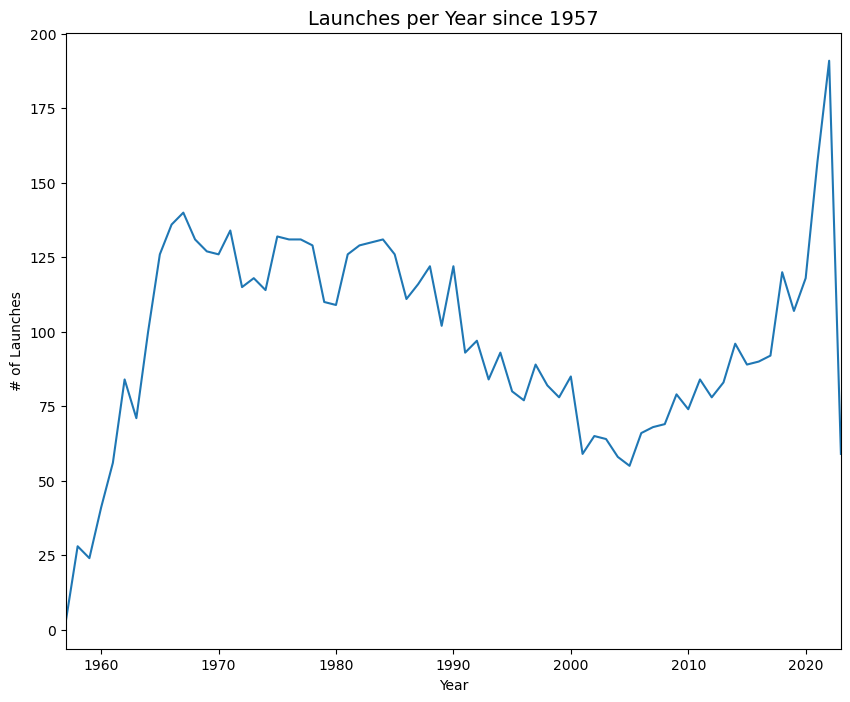

In [246]:
fig = plt.figure(figsize=(10,8))

plt.plot(launches_by_year.index, launches_by_year['Location'])
plt.xlim(launches_by_year.index.min(),launches_by_year.index.max())
         
plt.xlabel('Year')
plt.ylabel('# of Launches')
plt.title('Launches per Year since 1957', fontsize=14)
plt.show()

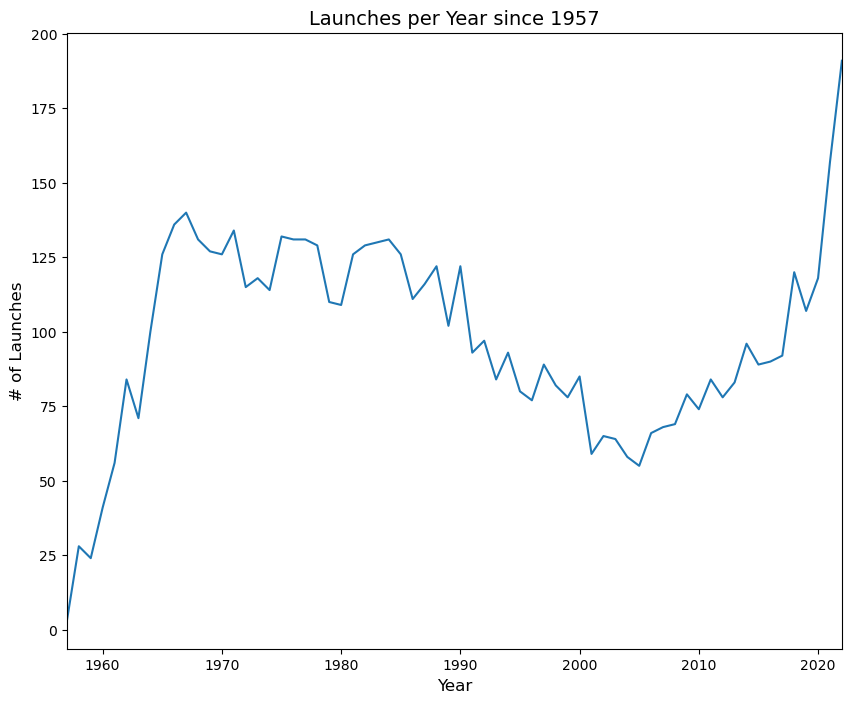

In [248]:
#excluding unfinished year 2023
fig = plt.figure(figsize=(10,8))

plt.plot(launches_by_year.index[:-1], launches_by_year['Location'][:-1])
plt.xlim(launches_by_year.index.min(),launches_by_year.index.max()-1)
         
plt.xlabel('Year', fontsize=12)
plt.ylabel('# of Launches', fontsize=12)
plt.title('Launches per Year since 1957', fontsize=14)
plt.show()

In [25]:
#xticks locators
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Launches per Month



In [273]:
df['Month'] = df['Datetime'].apply(lambda x: x.month)
# df['Month'] = df['Datetime'].apply(lambda x: x.strftime('%b'))

In [274]:
df['YM'] = pd.to_datetime(df[['Year','Month']].assign(DAY=1))
df['YM']

0      2023-04-01
1      2023-04-01
2      2023-04-01
3      2023-04-01
4      2023-04-01
          ...    
6505   1958-02-01
6506   1958-02-01
6507   1957-12-01
6508   1957-11-01
6509   1957-10-01
Name: YM, Length: 6510, dtype: datetime64[ns]

In [ ]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [265]:
df[['Year','Month']].value_counts()

Year  Month
2023  Mar      24
2021  Dec      24
2022  Oct      23
1971  Dec      20
2022  Nov      20
               ..
1958  Nov       1
1957  Nov       1
1959  Jan       1
      Jul       1
1957  Dec       1
Length: 783, dtype: int64

In [269]:
df['Month'].value_counts()

Dec    683
Oct    588
Jun    583
Sep    567
Apr    565
Aug    560
Jul    533
Nov    518
Mar    517
May    514
Feb    487
Jan    395
Name: Month, dtype: int64

In [280]:
by_month = df.groupby('YM').agg({'Month':pd.Series.count})
by_month.rename(columns={'Month':'Count'}, inplace=True)
by_month

,Count
YM,
1957-10-01,1
1957-11-01,1
1957-12-01,1
1958-02-01,2
1958-03-01,3
...,...
2022-12-01,18
2023-01-01,16
2023-02-01,12


Text(0.5, 1.0, 'Number of Launches per Month since 1957')

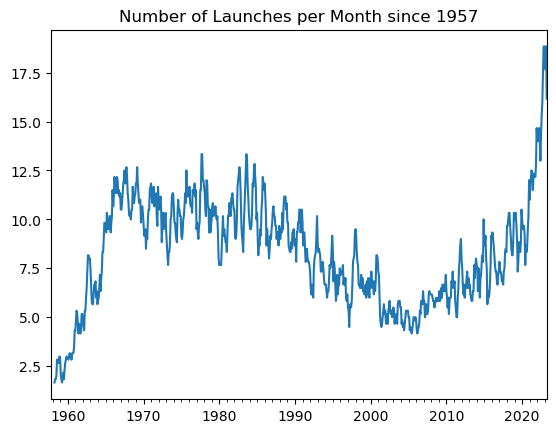

In [287]:
rolling_avg = by_month.rolling(window=6).mean()
plt.plot(rolling_avg.index,
        rolling_avg['Count'])

plt.xlim([rolling_avg.index.min(), rolling_avg.index.max()])
ax = plt.gca()
ax.xaxis.set_minor_locator(years)
plt.title('Number of Launches per Month since 1957')

# Launch Prices by years 



In [15]:
price_per_year = df[['Year','Price']]
price_per_year.dropna(inplace=True)

C:\Users\kaczo\AppData\Local\Temp\ipykernel_5876\3626545266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_per_year.dropna(inplace=True)


In [22]:
price_per_year = price_per_year.groupby('Year').mean()
price_per_year.head()

,Price
Year,
1964,63.23
1965,63.23
1966,59.00
1967,59.00
1968,59.00


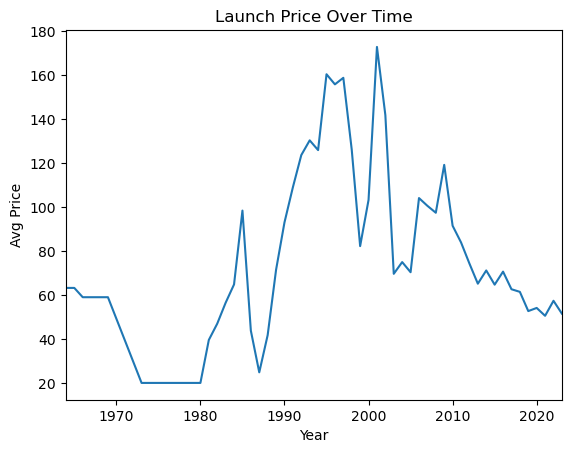

In [97]:
plt.plot(price_per_year.index, price_per_year['Price'])
plt.xlim([price_per_year.index.min(), price_per_year.index.max()])
ax = plt.gca()
plt.ylabel('Avg Price')
plt.xlabel('Year')
plt.title('Launch Price Over Time')
ax.xaxis.set_minor_locator(years)
plt.show()

# Top 10 Organisations: Number of Launches per year 



In [75]:
top10_org = df.groupby(['Organisation'], as_index=False).count().sort_values('Location',ascending=False)[['Organisation','Location']][:10]
# top10_org.reset_index(inplace=True)
# top10_org = top10_org[['Organisation','Location']].rename(columns={'Location':'Count'})
top10_org

,Organisation,Location
44,RVSN USSR,2476
56,US Air Force,549
10,CASC,484
47,Roscosmos,355
59,VKS RF,336
4,Arianespace,295
22,General Dynamics,251
53,SpaceX,233
39,NASA,222
55,ULA,155


In [79]:
org_by_year = df[['Organisation', 'Year','Location']].groupby(['Organisation','Year'],as_index=False).count()
org_by_year 

,Organisation,Year,Location
0,ABL SS,2023,1
1,ABMA,1958,7
2,ABMA,1959,4
3,ABMA,1960,2
4,ABMA,1961,3
...,...,...,...
783,Virgin Orbit,2023,1
784,i-Space,2019,1
785,i-Space,2021,2
786,i-Space,2022,1


In [88]:
merged_df = pd.merge(top10_org, org_by_year, on='Organisation')
merged_df.rename(columns={'Location_x':'Total','Location_y':'per_year'}, inplace=True)
merged_df

,Organisation,Total,Year,per_year
0,RVSN USSR,2476,1957,2
1,RVSN USSR,2476,1958,5
2,RVSN USSR,2476,1959,4
3,RVSN USSR,2476,1960,9
4,RVSN USSR,2476,1961,9
...,...,...,...,...
342,ULA,155,2018,8
343,ULA,155,2019,5
344,ULA,155,2020,6
345,ULA,155,2021,5


In [93]:
plot = px.line(merged_df,
              x='Year',
              y='per_year',
              color='Organisation',
              title='Number of Launches over Time by the Top 10 Organisations')
plot.update_layout(xaxis_title='Year',
                  yaxis_title='# of Launches')
plot.show()

# Countries with most launches per year



In [157]:
max_launch_ct = df.groupby(['Year','Country'], as_index=False).agg({'Status':pd.Series.count})
max_launch_ct.rename(columns={'Status':'Num_launches'},inplace=True)
max_launch_ct

,Year,Country,Num_launches
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
471,2023,Kazakhstan,4
472,2023,New Zealand,1
473,2023,Russia,2
474,2023,USA,28


In [161]:
max_launch_ct.groupby('Year').apply(lambda x: x.nlargest(1,'Num_launches'))

,,Year,Country,Num_launches
Year,,,,
1957,0,1957,Kazakhstan,2
1958,3,1958,USA,23
1959,5,1959,USA,20
1960,7,1960,USA,32
1961,10,1961,USA,47
...,...,...,...,...
2019,424,2019,China,33
2020,443,2020,USA,41
2021,454,2021,USA,57


In [163]:
#FOR SUCCESSFUL MISSION ONLY
max_launch_ct = df[df['Mission_status'] == 'Success']
max_launch_ct = max_launch_ct.groupby(['Year','Country'], as_index=False).agg({'Status':pd.Series.count})
max_launch_ct.rename(columns={'Status':'Num_launches'},inplace=True)
max_launch_ct.groupby('Year').apply(lambda x: x.nlargest(1,'Num_launches'))

,,Year,Country,Num_launches
Year,,,,
1957,0,1957,Kazakhstan,2
1958,2,1958,USA,5
1959,4,1959,USA,8
1960,6,1960,USA,17
1961,8,1961,USA,29
...,...,...,...,...
2019,379,2019,China,31
2020,397,2020,USA,36
2021,399,2021,China,52


# Number of Launches per Organisation by year



In [164]:
max_launch_org = df.groupby(['Year','Organisation'], as_index=False).agg({'Status':pd.Series.count})
max_launch_org.rename(columns={'Status':'Num_launches'},inplace=True)
max_launch_org

,Year,Organisation,Num_launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,ABMA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
783,2023,Space Pioneer,1
784,2023,SpaceX,24
785,2023,VKS RF,3
786,2023,Virgin Orbit,1


In [174]:
plot = px.line(x=max_launch_org['Year'],
       y=max_launch_org['Num_launches'],
       color=max_launch_org['Organisation'],
        hover_name=max_launch_org['Organisation'])
plot.show()